1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import imblearn
from sklearn import model_selection
from scipy import stats
import joblib

2. Import dataset

In [3]:
df = pd.read_csv('facebook-dataset.csv')
df.head()

,profile id,#friends,#following,#community,age,#postshared,#urlshared,#photos/videos,fpurls,fpphotos/videos,avgcomment/post,likes/post,tags/post,#tags/post,Label
0,1,39,300,907,200,1000,850,922,0.490000,0.550000,0.56,0.47,40,14,1
1,2,150,350,30,300,300,100,290,0.330000,0.960000,0.50,1.20,10,4,0
2,3,300,450,50,465,500,150,450,0.200000,0.840000,0.40,1.50,15,7,0
3,4,25,110,660,350,2050,2000,2050,0.975610,1.000000,0.70,0.30,54,21,1
4,5,24,100,150,800,950,1000,900,1.052632,0.947368,0.66,0.50,55,20,1


Display Heads

In [4]:
df.head(2)

,profile id,#friends,#following,#community,age,#postshared,#urlshared,#photos/videos,fpurls,fpphotos/videos,avgcomment/post,likes/post,tags/post,#tags/post,Label
0,1,39,300,907,200,1000,850,922,0.49,0.55,0.56,0.47,40,14,1
1,2,150,350,30,300,300,100,290,0.33,0.96,0.50,1.20,10,4,0


Describe the dataset

In [5]:
df.describe()

,profile id,#friends,#following,#community,age,#postshared,#urlshared,#photos/videos,fpurls,fpphotos/videos,avgcomment/post,likes/post,tags/post,#tags/post,Label
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,301.175000,1066.355000,1068.670000,207.646667,1214.605000,1158.115000,369.750000,1120.783333,0.186946,0.961135,1.589399,0.880745,40.060000,16.001667,0.171667
std,173.729861,669.497972,677.262425,370.622053,471.261985,835.521159,720.084739,836.186049,0.251061,0.145149,27.129974,0.504153,15.958096,6.434335,0.377405
min,1.000000,4.000000,1.000000,12.000000,125.000000,76.000000,11.000000,65.000000,0.011226,0.000000,0.000000,0.102000,10.000000,1.000000,0.000000
25%,150.750000,663.500000,658.000000,39.000000,926.500000,588.250000,38.000000,563.750000,0.042174,0.930512,0.267250,0.456000,30.000000,12.000000,0.000000
50%,301.500000,1159.000000,1132.000000,56.000000,1136.000000,876.500000,49.000000,826.500000,0.076754,0.969883,0.456000,0.880000,39.000000,15.500000,0.000000
75%,451.250000,1473.750000,1473.750000,77.000000,1452.250000,1410.000000,83.000000,1380.000000,0.131323,0.993068,0.630000,1.230000,47.000000,19.250000,0.000000
max,601.000000,5554.000000,5312.000000,1789.000000,2697.000000,3896.000000,2956.000000,3891.000000,1.086957,2.739726,665.000000,2.800000,99.000000,32.000000,1.000000


Display information of the dataset

In [6]:
df.info

<bound method DataFrame.info of      profile id  #friends  #following  #community   age  #postshared  \
0             1        39         300         907   200         1000   
1             2       150         350          30   300          300   
2             3       300         450          50   465          500   
3             4        25         110         660   350         2050   
4             5        24         100         150   800          950   
..          ...       ...         ...         ...   ...          ...   
595         597        83          29         510  2000         2994   
596         598        93          28         563  2500         3420   
597         599        33          27        1000   900         1945   
598         600       100          26        1500   800         1876   
599         601        25          17         730  1560         2002   

     #urlshared  #photos/videos    fpurls  fpphotos/videos  avgcomment/post  \
0           850         

Display the shape (No. of rows and columns) of the dataset

In [7]:
df.shape

(600, 15)

Check the null values in the dataset

In [8]:
df.isnull().sum()

profile id         0
#friends           0
#following         0
#community         0
age                0
#postshared        0
#urlshared         0
#photos/videos     0
fpurls             0
fpphotos/videos    0
avgcomment/post    0
likes/post         0
tags/post          0
#tags/post         0
Label              0
dtype: int64

In [9]:
df = df
df['Label'].replace([0,1], ['Legitimate', 'Fake'], inplace=True)
df.drop('profile id', axis=1, inplace=True)

Print number of Features and no of samples

In [10]:
print('Number of features: {}'.format(df.shape[1]))
print('Number of examples: {}'.format(df.shape[0]))

Number of features: 14
Number of examples: 600


**3. Data Visualization**

Scatter Plot

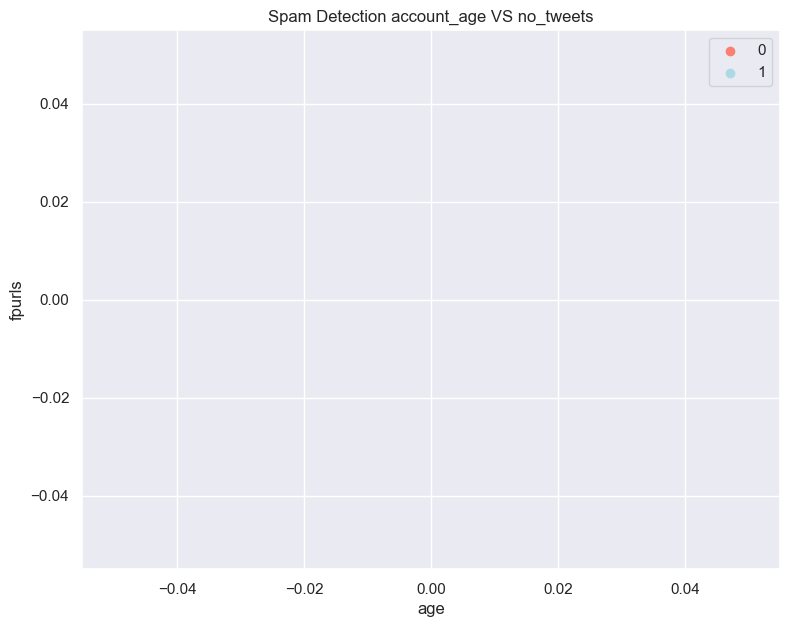

In [11]:
import matplotlib.pyplot as plt
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(df.age[df.Label ==1],
            df.fpurls[df.Label==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.Label ==0],
            df.fpurls[df.Label ==0],
            c="lightblue")

# Add some helpful info
plt.title("Spam Detection account_age VS no_tweets")
plt.xlabel("age")
plt.ylabel("fpurls")
plt.legend(["0", "1"]);

Correlation Matrix

In [12]:
# Let's make our correlation matrix a little prettier
import seaborn as sns
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".3f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ValueError: could not convert string to float: 'Fake'

Count Number Positive and Negative samples

In [13]:
print(df['Label'].value_counts())

Label
Legitimate    497
Fake          103
Name: count, dtype: int64


In [14]:

df['Label'] = pd.Categorical(df['Label']).codes
print(df)

     #friends  #following  #community   age  #postshared  #urlshared  \
0          39         300         907   200         1000         850   
1         150         350          30   300          300         100   
2         300         450          50   465          500         150   
3          25         110         660   350         2050        2000   
4          24         100         150   800          950        1000   
..        ...         ...         ...   ...          ...         ...   
595        83          29         510  2000         2994        1876   
596        93          28         563  2500         3420        2364   
597        33          27        1000   900         1945        1520   
598       100          26        1500   800         1876        1320   
599        25          17         730  1560         2002        1546   

     #photos/videos    fpurls  fpphotos/videos  avgcomment/post  likes/post  \
0               922  0.490000         0.550000          

4. Dataset Splitting

In [15]:
def read_dataset(filename):
    return model_selection.train_test_split(df.drop(['Label'], axis=1), df["Label"], train_size=0.8)

In [16]:
Xtrain, Xtest, Ytrain, Ytest = read_dataset(df)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

5. Clasification using Machine Learning Algorithm

**A. SVM**

In [18]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


svm_clf = make_pipeline(StandardScaler(), SVC())
svm_clf.fit(Xtrain, Ytrain)
predictions = svm_clf.predict(Xtest)

print('Predictions: \n', predictions)
print('\nConfusion matrix: \n', confusion_matrix(Ytest, predictions))
print('\nEvaluation metrics: \n',classification_report(Ytest, predictions))

print_score(svm_clf, Xtrain, Ytrain, Xtest, Ytest, train=True)
print_score(svm_clf, Xtrain, Ytrain, Xtest, Ytest, train=False)
joblib.dump(svm_clf, 'svm_clf.sav') 

Predictions: 
 [1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1]

Confusion matrix: 
 [[22  5]
 [ 1 92]]

Evaluation metrics: 
               precision    recall  f1-score   support

           0       0.96      0.81      0.88        27
           1       0.95      0.99      0.97        93

    accuracy                           0.95       120
   macro avg       0.95      0.90      0.92       120
weighted avg       0.95      0.95      0.95       120

Train Result:
Accuracy Score: 96.88%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.886076    0.985037   0.96875    0.935557      0.969369
recall      0.921053    0.977723   0.96875    0.949388      0.968750
f1-score    0.903226    0.981366   

['svm_clf.sav']

In [42]:
Xtest.iloc[0]

#friends           1489.000000
#following         1051.000000
#community           31.000000
age                1011.000000
#postshared         756.000000
#urlshared           58.000000
#photos/videos      721.000000
fpurls                0.076720
fpphotos/videos       0.953704
avgcomment/post       0.220000
likes/post            0.780000
tags/post            25.000000
#tags/post            9.000000
Name: 113, dtype: float64

In [46]:
type(predictions.tolist)

builtin_function_or_method

**B. KNN**

In [19]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=10, weights='distance', p=1)
clf_knn = make_pipeline(StandardScaler(), neigh)
clf_knn.fit(Xtrain, Ytrain)
predictions = clf_knn.predict(Xtest)

print('Predictions: \n', predictions)
print('\nConfusion matrix: \n', confusion_matrix(Ytest, predictions))
print('\nEvaluation metrics: \n',classification_report(Ytest, predictions))

print_score(clf_knn, Xtrain, Ytrain, Xtest, Ytest, train=True)
print_score(clf_knn, Xtrain, Ytrain, Xtest, Ytest, train=False)

joblib.dump(clf_knn, 'clf_knn.sav') 

Predictions: 
 [1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1]

Confusion matrix: 
 [[24  3]
 [ 2 91]]

Evaluation metrics: 
               precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.97      0.98      0.97        93

    accuracy                           0.96       120
   macro avg       0.95      0.93      0.94       120
weighted avg       0.96      0.96      0.96       120

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support  

['clf_knn.sav']

**C. DT**

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(Xtrain, Ytrain)

print('Predictions: \n', predictions)
print('\nConfusion matrix: \n', confusion_matrix(Ytest, predictions))
print('\nEvaluation metrics: \n',classification_report(Ytest, predictions))

print_score(tree_clf, Xtrain, Ytrain, Xtest, Ytest, train=True)
print_score(tree_clf, Xtrain, Ytrain, Xtest, Ytest, train=False)

joblib.dump(tree_clf, 'clf_dt.sav') 

Predictions: 
 [1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1]

Confusion matrix: 
 [[24  3]
 [ 2 91]]

Evaluation metrics: 
               precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.97      0.98      0.97        93

    accuracy                           0.96       120
   macro avg       0.95      0.93      0.94       120
weighted avg       0.96      0.96      0.96       120

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support  

['clf_dt.sav']

**D. Random FOrest**

In [21]:
from sklearn.ensemble import RandomForestClassifier
rand_for = RandomForestClassifier(criterion='entropy', n_estimators=100)
clf_rf = make_pipeline(StandardScaler(), rand_for)
clf_rf.fit(Xtrain, Ytrain)
predictions = clf_rf.predict(Xtest)

print('Predictions: \n', predictions)
print('\nConfusion matrix: \n', confusion_matrix(Ytest, predictions))
print('\nEvaluation metrics: \n',classification_report(Ytest, predictions))

print_score(clf_rf, Xtrain, Ytrain, Xtest, Ytest, train=True)
print_score(clf_rf, Xtrain, Ytrain, Xtest, Ytest, train=False)


Predictions: 
 [1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1]

Confusion matrix: 
 [[24  3]
 [ 2 91]]

Evaluation metrics: 
               precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.97      0.98      0.97        93

    accuracy                           0.96       120
   macro avg       0.95      0.93      0.94       120
weighted avg       0.96      0.96      0.96       120

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support  